 # Calculating the Mass of the Muon and the Pion

###### Chelsey McMichael and Jelena Colon

# Abstract

The purpose of this experiment was to determine the masses of a pion and a muon by analyzing photographs of the bubble chamber in which they decayed. The photographs are visual records of a pion being accelerated in an electric field and decaying into a muon. The muon then travels for a short distance and decays into a positron. By measuring the radius of the trajectory of a positron, and the length of the path of the muon, we determined their masses to be 146.63 MeV/c^2 and 109.97 MeV/c^2, respectively. Compared to the theoretical value, our error in measurement for the mass of the muon was calculated to be 3.747% and for the mass of the pion it was calculated to be 6.024%.

# Introduction

The photographs used in this experiment are visual records of the trail of ionization left by a charged particle in a bubble chamber. This allows us to examine the trajectory of the particle which would change when it decays into a new particle. In the photographs we examined, a pion was accelerated through the bubble chamber and followed a curved path due to the electric field. Once decayed into a muon there is an abrupt change in trajectory due to the muon traveling for a short distance making it appear as a straight line until it decays into a positron. The decay into a positron again marks an abrupt change in trajectory and it starts to move in a curved path. By measuring the radius of the path of the position and the length of the path of the muon, we are able to determine their approximate masses.

<img src="image_jc_cm.png" height="350" width="350">
###### Fig.1 shows the decays of pions and muons in a hydrogen bubble chamber

# Procedure

We began with analyzing several different photographs of pion-muon decays in a bubble chamber. Within a single photograph there were varying amounts of measurable decay processes. For a single decay process, we first determined which trajectory belonged to the pion, which belonged to the muon and which belonged to the positron. This is evident because the pions ionization path was the darkest and emerged from the left of the photo. Then when it decays into the muon its path changes direction and is so short that it appears to be a straight line. Lastly, the muon decays into a positron and the path changes direction again this time the ionization path was much lighter on the paper. Next, we began taking measurements of that process by finding the radius of the path of the positron in centimeters and the length of the path of the muon in centimeters using a ruler. This was repeated for each and every decay process visible in a photograph and then continued for multiple photographs. We then were able to use the radius of the positrons path to calculate the momentum of the muon and consequently calculate its mass as well as the mass of the pion.

\begin{equation}
\\{\pi^+}{\rightarrow}{\mu^+}+{\upsilon}~~~~~~~~{(1)}
\end{equation}

###### Equation 1 shows the decay of the pion into a meson and a neutrino

\begin{equation}
\\{\mu^+}{\rightarrow}{e^+}+{\upsilon}+{\upsilon^{'}}~~~{(2)}
\end{equation}

###### Equation 2 shows the decay of the meson into a positron and two neutrinos

# Data

# Calculations 

In [18]:
from astropy.io import ascii
data=ascii.read("data.csv") #this is the collection of class data

avg = sum(data['radius']) / len(data['radius']) #this takes the radius data, and len prevents blank spaces from being counted
print('The average radius is', data['radius'].mean(), "cm.")

avg1 = sum(data['length']) / len(data['length']) #this is like the statement above
print('The average length is', data['length'].mean(), 'cm.')

The average radius is 10.9 cm.
The average length is 1.01923863636 cm.


In [4]:
l_avg =1.01923863636  #cm
r_avg = 10.9  #cm

#c = (3 * 10) ** 10 #cm/s, not needed
c = 1
r_per = (r_avg) / (0.785) #cm
rho = .07 #gm/cm^3

l_per = l_avg / .785 #cm

m_muon = 3* (2.64 * r_per) /c #MeV/c^2

T = (2.1*((m_muon)* c **2) * rho * l_per)**.5

p_muon = ((T**2) + (2*T*(m_muon)* (c**2)))**.5

m_pion = ((((p_muon * c)**2+ (m_muon * c ** 2) ** 2) **.5) + (p_muon * c ))/ (c **2) #MeV/c^2


print('The mass of the muon is',m_muon, 'MeV/c^2')

print('The mass of the pion is', m_pion, 'MeV/c^2')

The mass of the muon is 109.971974522293 MeV/c^2
The mass of the pion is 146.6260201304343 MeV/c^2


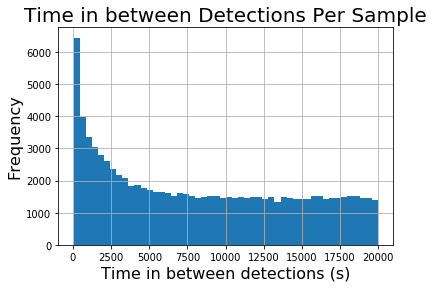

In [5]:
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon


data=ascii.read("exp_data.csv")
time_change = data['delta_t']

plt.hist(time_change, bins=50, normed=True)
plt.title("Time in between Detections Per Sample", fontsize=20)
plt.xlabel("Time in between detections (s)", fontsize = 16)
plt.ylabel("Frequency", fontsize = 16)
plt.grid(True)
plt.show()
#this should be nongaussian


###### To determine the accuracy of the mass calculations, we should determine the percent error in both calculations:

Find the percent error of the mass of the muon using:
\begin{equation}
{\%~{error}}= \frac{|Measured~Value - Theoretical~Value|}{Theoretical~Value}\times 100
\end{equation}

Substitute the value of each quantity into the equation:

\begin{equation}
{\%~{error}}= \frac{|109.971974522293~MeV/c^2 - 106~MeV/c^2|}{106~m/s}\times 100
\end{equation}

\begin{equation}
{\%~{error}}= \frac{|3.97197~MeV/c^2|}{106~MeV/c^2}\times 100
\end{equation}

\begin{equation}
{\%~{error}}= {0.037471}\times 100
\end{equation}

\begin{equation}
{\%~{error}}= {3.74715\%}
\end{equation}

Thus, the percentage of error is 3.747%



Find the percent error of the mass of the pion using:

\begin{equation}
{\%~{error}}= \frac{|Measured~Value - Theoretical~Value|}{Theoretical~Value}\times 100
\end{equation}

Substitute the value of each quantity into the equation:

\begin{equation}
{\%~{error}}= \frac{|146.626~MeV/c^2 - 140~MeV/c^2|}{140~MeV/c^2}\times 100
\end{equation}

\begin{equation}
{\%~{error}}= \frac{|6.6260~MeV/c^2|}{110~MeV/c^2}\times 100
\end{equation}

\begin{equation}
{\%~{error}}= {0.06023655}\times 100
\end{equation}

\begin{equation}
{\%~{error}}= {6.02366\%}
\end{equation}

Thus, the percentage of error is 6.024%.



# Conclusion

concoo

# References

https://www.w3schools.com/tags/att_img_width.asp

http://web.ift.uib.no/Teori/KURS/WRK/TeX/symALL.html